In [ ]:
#Import all Library needed
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt
from random import seed
from random import randrange
from csv import reader
from math import exp
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
import pandas as pd
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']
print (df)

    gmat  gpa  work_experience  admitted
0    780  4.0                3         1
1    750  3.9                4         1
2    690  3.3                3         0
3    710  3.7                5         1
4    680  3.9                4         0
5    730  3.7                6         1
6    690  2.3                1         0
7    720  3.3                4         1
8    740  3.3                5         1
9    690  1.7                1         0
10   610  2.7                3         0
11   690  3.7                5         1
12   710  3.7                6         1
13   680  3.3                4         0
14   770  3.3                3         1
15   610  3.0                1         0
16   580  2.7                4         0
17   650  3.7                6         1
18   540  2.7                2         0
19   590  2.3                3         0
20   620  3.3                2         1
21   600  2.0                1         0
22   550  2.3                4         0
23   550  2.7   

Diatas semua data dari soal nomor 4 dimasukkan ke dalam dataframe dan dibagi menjadi 2 dimana featurenya dimasukkan ke variable X dan labelnya atau classnya dimasukkan ke dalam variable y.

In [ ]:
X = StandardScaler().fit_transform(X)

Lalu dilakukan Standard Scaler pada variable featurenya atau X

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Setelah itu dataset dibagi menjadi 2 dengan ratio 80:20 dimana 80 sebagai training set dan 20 sebagai test set, dengan random state yaitu 1.

In [ ]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

Lalu di define function model yaitu logistic regression dengan membuat function sigmoid, loss untuk menghitung jumlah error, dan function fit untuk memasukkan dataset nantinya ke dalam model , lalu fucntion predict untuk memprediksi hasil akurasi nantinya dari model.

In [ ]:
model = LogisticRegression(0.4, num_iter= 5000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test, 0.4)

Setelah function sudah jadi dan siap untuk digunakan dataset training dimasukkan ke dalam model dengan jumlah iterasi sebanyak 5000 dan learning rate sebesar 0.4.

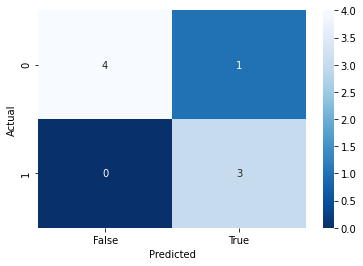

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, cmap = 'Blues_r')

Setelah itu dilakukan evaluasi hasil dari model yang ditraining dengan menggunakan confusion matrix untuk mengetahui berapa kali model berhasil menebak dengan benar/salah per class atau labelnya.

In [ ]:
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.875


Lalu dilakukan evaluasi model akhir dengan mencari akurasi dari model tersebut dengan membandingkan y_test atau dengan y_pred.